In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np


In [2]:
data = pd.read_csv("/kaggle/input/oranges-vs-grapefruit/citrus.csv")
print (data.head())
print(data.shape)
data.info()


     name  diameter  weight  red  green  blue
0  orange      2.96   86.76  172     85     2
1  orange      3.91   88.05  166     78     3
2  orange      4.42   95.17  156     81     2
3  orange      4.47   95.60  163     81     4
4  orange      4.48   95.76  161     72     9
(10000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


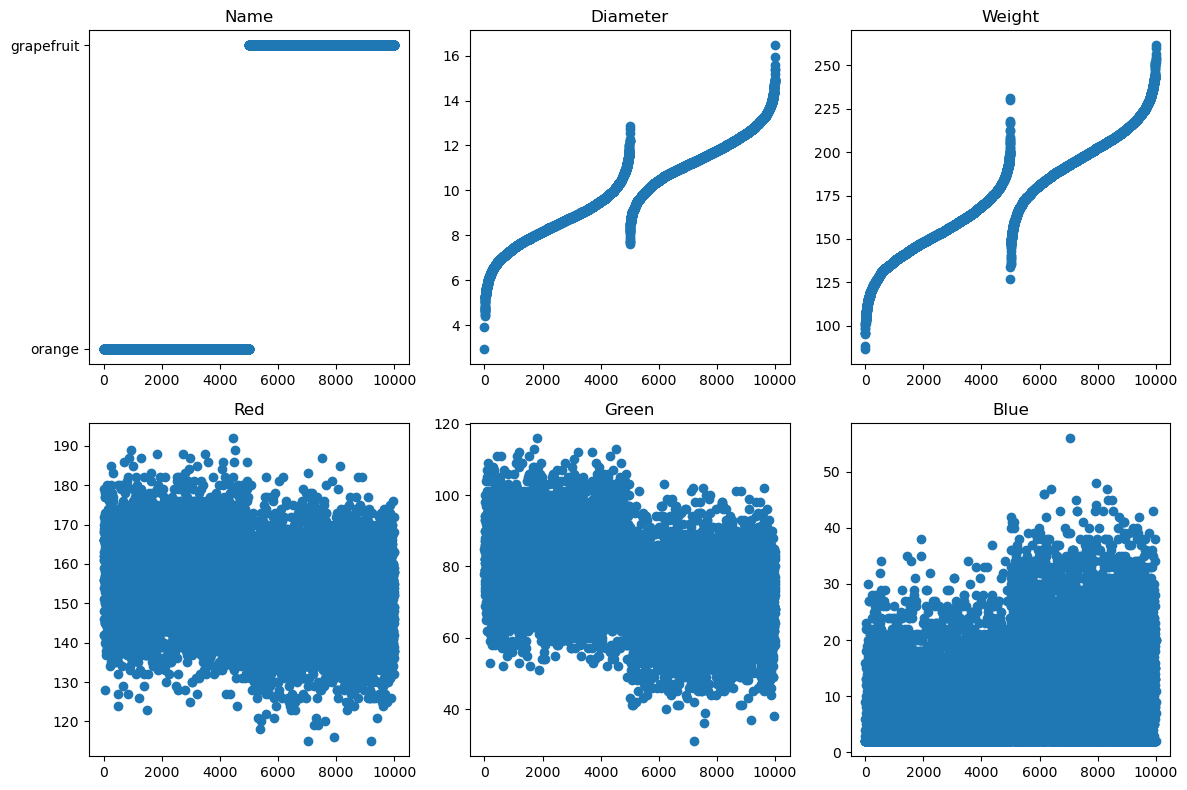

In [3]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot on the first subplot
axs[0, 0].scatter(data.index, data['name'])
axs[0, 0].set_title('Name')

# Plot on the second subplot
axs[0, 1].scatter(data.index, data['diameter'])
axs[0, 1].set_title('Diameter')

# Plot on the third subplot
axs[0, 2].scatter(data.index, data['weight'])
axs[0, 2].set_title('Weight')

# Plot on the fourth subplot
axs[1, 0].scatter(data.index, data['red'])
axs[1, 0].set_title('Red')

# Plot on the fifth subplot
axs[1, 1].scatter(data.index, data['green'])
axs[1, 1].set_title('Green')

# Plot on the sixth subplot
axs[1, 2].scatter(data.index, data['blue'])
axs[1, 2].set_title('Blue')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

Update my dataset and remove outliers
outliers could be :

  * Empty cells

  * Data in wrong format

  * Wrong data

  * Duplicates


Calculate Mean,STD,Variance for all given columns

In [4]:
# Create a dictionary to store the statistical measures
stat_dict = {
    "name": [],
    "diameter": [],
    "weight": [],
    "red": [],
    "green": [],
    "blue": []
}

# Iterate over the columns in the dataset
for label in data.columns:
    # Convert column values to numeric type, non-numeric values will be set as NaN
    values = pd.to_numeric(data[label], errors='coerce')

    # Check if all values in the column are not null (i.e., numeric)
    if values.notnull().all():
        # Calculate statistical measures and append them to the respective list in stat_dict
        stat_dict[label].extend( [np.mean(values) , np.var(values) ,np.std(values)])

print(stat_dict)

{'name': [], 'diameter': [9.975685, 3.7937155107750002, 1.9477462644746621], 'weight': [175.050792, 853.262576972736, 29.210658619290598], 'red': [153.8478, 108.83563515999997, 10.43243189098304], 'green': [76.0106, 137.07368764, 11.707847267538128], 'blue': [11.3632, 82.09848576, 9.060821472692197]}


In [5]:
# First, we define our limits
limits_dict = {}

for label, stats in stat_dict.items():
    if len(stats) >= 3:
        lower_limit = stats[0] - (3 * stats[2])
        upper_limit = stats[0] + (3 * stats[2])
        limits_dict[label] = [lower_limit, upper_limit]
    else:
        print(f"Insufficient data for {label}")

print(limits_dict)

# Filter the data DataFrame based on the defined limits
for label in data.columns:
    for x in data.index:
        if label in limits_dict and len(limits_dict[label]) >= 2:
            if data.loc[x, label] < limits_dict[label][0] or data.loc[x, label] > limits_dict[label][1]:
                data.drop(x, inplace=True)

print(data)


Insufficient data for name
{'diameter': [4.132446206576014, 15.818923793423988], 'weight': [87.41881614212821, 262.6827678578718], 'red': [122.55050432705089, 185.14509567294914], 'green': [40.88705819738561, 111.13414180261438], 'blue': [-15.81926441807659, 38.54566441807659]}
            name  diameter  weight  red  green  blue
2         orange      4.42   95.17  156     81     2
3         orange      4.47   95.60  163     81     4
4         orange      4.48   95.76  161     72     9
5         orange      4.59   95.86  142    100     2
6         orange      4.64   97.94  156     85     2
...          ...       ...     ...  ...    ...   ...
9993  grapefruit     14.96  252.28  152     58     9
9994  grapefruit     15.16  253.64  136     76    20
9995  grapefruit     15.35  253.89  149     77    20
9996  grapefruit     15.41  254.67  148     68     7
9997  grapefruit     15.59  256.50  168     82    20

[9909 rows x 6 columns]


In [6]:
# Select the columns to be standardized
columns_to_standardize = ['diameter', 'weight', 'red', 'green', 'blue']

# Standardize the selected columns
for column in columns_to_standardize:
    mean = stat_dict[column][0]
    std = stat_dict[column][2]
    data[column] = (data[column] - mean) / std

print(data)

            name  diameter    weight       red     green      blue
2         orange -2.852366 -2.734645  0.206299  0.426159 -1.033372
3         orange -2.826695 -2.719925  0.877283  0.426159 -0.812642
4         orange -2.821561 -2.714447  0.685574 -0.342557 -0.260815
5         orange -2.765086 -2.711024 -1.135670  2.049002 -1.033372
6         orange -2.739415 -2.639817  0.206299  0.767810 -1.033372
...          ...       ...       ...       ...       ...       ...
9993  grapefruit  2.559017  2.643871 -0.177121 -1.538336 -0.260815
9994  grapefruit  2.661699  2.690429 -1.710800 -0.000905  0.953203
9995  grapefruit  2.759248  2.698988 -0.464686  0.084507  0.953203
9996  grapefruit  2.790053  2.725690 -0.560540 -0.684208 -0.481546
9997  grapefruit  2.882467  2.788339  1.356558  0.511571  0.953203

[9909 rows x 6 columns]


Now , time to split my data into training data and testing data

In [7]:

size = data.shape[0]
train_index =np.ceil( size*0.8)
test_index=size - train_index


print(f"size: {size}")
print(f"train_index: {train_index}")
print(f"test_index: {test_index}")

data_train = pd.DataFrame(data.loc[:train_index])
data_test = pd.DataFrame(data.loc[train_index + 1:])

print("data_train:")
print(data_train.head())

print("data_test:")
print(data_test.head())

print(data_train.shape)
print(data_test.shape)
print(type(data_train))



size: 9909
train_index: 7928.0
test_index: 1981.0
data_train:
     name  diameter    weight       red     green      blue
2  orange -2.852366 -2.734645  0.206299  0.426159 -1.033372
3  orange -2.826695 -2.719925  0.877283  0.426159 -0.812642
4  orange -2.821561 -2.714447  0.685574 -0.342557 -0.260815
5  orange -2.765086 -2.711024 -1.135670  2.049002 -1.033372
6  orange -2.739415 -2.639817  0.206299  0.767810 -1.033372
data_test:
            name  diameter    weight       red     green      blue
7929  grapefruit  0.895556  0.914707  0.302154  0.426159 -0.260815
7930  grapefruit  0.900690  0.915050 -0.272976 -0.684208  1.394664
7932  grapefruit  0.900690  0.915392 -0.081266 -0.342557  0.070281
7933  grapefruit  0.900690  0.915735  0.206299 -1.623749  1.173933
7934  grapefruit  0.900690  0.916419  0.685574  0.255333  0.180646
(7867, 6)
(2042, 6)
<class 'pandas.core.frame.DataFrame'>


Plotting Each column

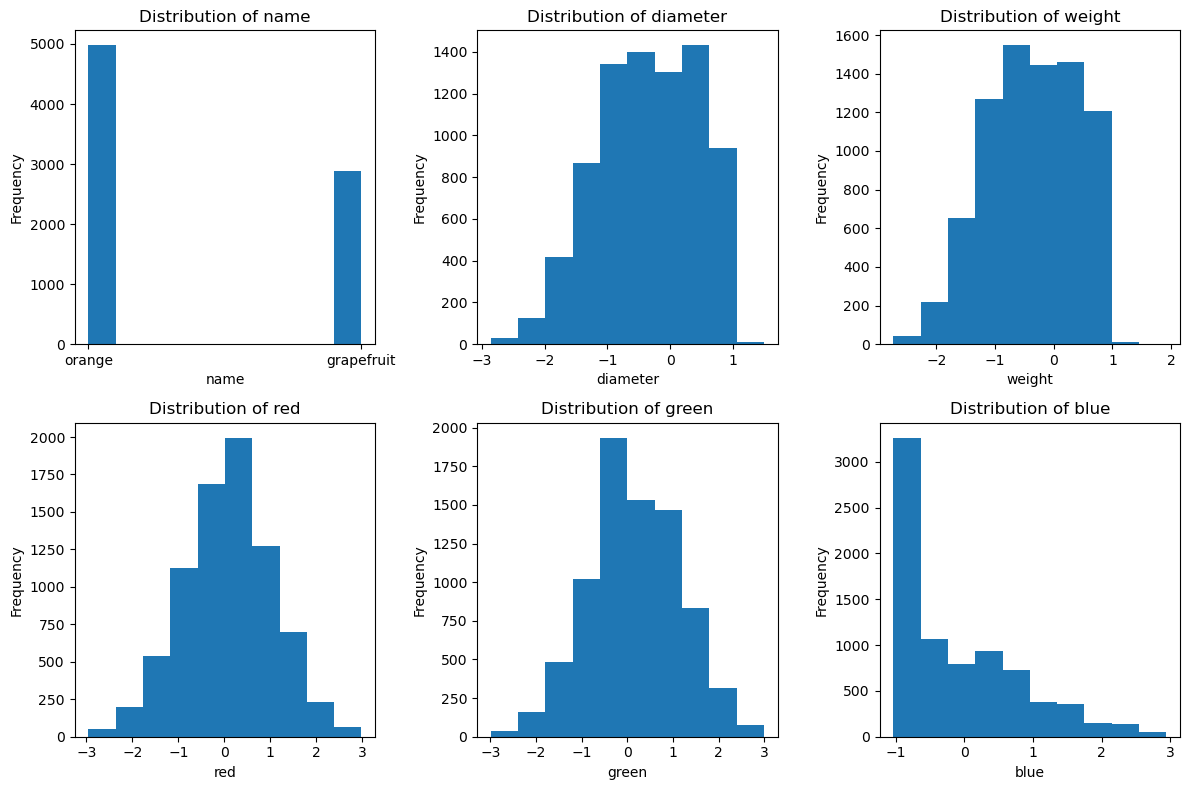

In [8]:
import matplotlib.pyplot as plt

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Flatten the axs array to iterate over the subplots
axs = axs.flatten()

# Plot the distribution of each column in data_train
for i, column in enumerate(data_train.columns):
    axs[i].hist(data_train[column], bins=10)
    axs[i].set_title(f"Distribution of {column}")
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Frequency")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()
